In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn
import datetime
from sklearn import preprocessing
from scipy import stats

#bikeday = pd.read_csv('day.csv')
bikehour = pd.read_csv('hour.csv')

In [2]:
bikeday.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [3]:
bikehour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
bikeday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [97]:
bikehour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [98]:
bikeday.shape

(731, 16)

In [99]:
bikehour.shape

(17379, 17)

In [15]:
bikeday.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [2]:
bikehour.loc[bikehour['dteday'] == '2011-01-04']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
69,70,2011-01-04,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045,0,5,5
70,71,2011-01-04,1,0,1,1,0,2,1,1,0.16,0.1818,0.59,0.1045,0,2,2
71,72,2011-01-04,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,0,1,1
72,73,2011-01-04,1,0,1,4,0,2,1,1,0.14,0.1818,0.63,0.0896,0,2,2
73,74,2011-01-04,1,0,1,5,0,2,1,1,0.12,0.1515,0.68,0.1045,0,4,4
74,75,2011-01-04,1,0,1,6,0,2,1,1,0.12,0.1515,0.74,0.1045,0,36,36
75,76,2011-01-04,1,0,1,7,0,2,1,1,0.12,0.1515,0.74,0.1343,2,92,94
76,77,2011-01-04,1,0,1,8,0,2,1,1,0.14,0.1515,0.69,0.1642,2,177,179
77,78,2011-01-04,1,0,1,9,0,2,1,1,0.16,0.1515,0.64,0.2239,2,98,100
78,79,2011-01-04,1,0,1,10,0,2,1,2,0.16,0.1364,0.69,0.3284,5,37,42


In [6]:
bikehour.loc[bikehour['dteday'] == '2011-01-09', 'cnt'].sum()

822

In [28]:
bikehour.temp.unique().sum()

25.500000000000004

In [29]:
bikeday.temp.unique().sum()

241.2099024

In [2]:
# Do the conversion and renaming, expanding of feature set here
# - instant: record index
# - dteday : date
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - mnth : month ( 1 to 12)
# - yr : year (0: 2011, 1:2012)
# wwekday : SUNDAY is 0, SATURDAY is 6
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0
# weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max) ???

# "De-normalize"
# Denormalized = ($normalizedValue * ($max-$min) + $min)

hdf = bikehour.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})
#ddf = bikeday.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'is_workday', 'hum': 'humidity', 'cnt': 'users_total', 'holiday': 'is_holiday', 'atemp': 'felt_temperature', 'temp': 'temperature', 'weathersit': 'weather', 'casual': 'casual_users', 'registered': 'registered_users'})

In [3]:
hdf.describe()

,instant,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,humidity,windspeed,casual_users,registered_users,users_total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
hdf.head()

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,humidity,windspeed,casual_users,registered_users,users_total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hdf['season'] = hdf['season'].replace([1, 2, 3, 4], ['winter', 'spring', 'summer', 'fall'])
hdf['year'] = hdf['year'].replace([0, 1], [2011, 2012])
hdf['weekday'] = hdf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hdf['month'] = hdf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
hdf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
hdf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
hdf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])

#ddf['season'] = ddf['season'].replace([1, 2, 3, 4], ['winter', 'sprin4g', 'summer', 'fall'])
#ddf['year'] = ddf['year'].replace([0, 1], [2011, 2012])
#ddf['weekday'] = ddf['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
#ddf['month'] = ddf['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#ddf['weather'] = hdf['weather'].replace([1, 2, 3, 4], ['A', 'B', 'C', 'D'])
#ddf['is_holiday'] = hdf['is_holiday'].replace([1, 0], [True, False])
#ddf['is_workday'] = hdf['is_workday'].replace([1, 0], [True, False])

In [8]:
hdf.dtypes

instant               int64
date                 object
season               object
year                  int64
month                object
hour                  int64
is_holiday             bool
weekday              object
is_workday             bool
weather              object
temperature         float64
felt_temperature    float64
humidity            float64
windspeed           float64
casual_users          int64
registered_users      int64
users_total           int64
dtype: object

In [4]:
#hdf['date'] = pd.to_datetime(hdf['date'])
#ddf['date'] = pd.to_datetime(ddf['date'])
# or
hdf['date'] = hdf['date'].astype('datetime64')
#ddf['date'] = ddf['date'].astype('datetime64')
# We could even have converted the - then dteday - column to datetime while readingthe .csv file by adding , parse_dates=['dteday'])
# bikeday = pd.read_csv('day.csv'), parse_dates=['dteday'])
# bikehour = pd.read_csv('hour.csv'), parse_dates=['dteday'])

In [5]:
hdf['is_weekend'] = np.where((hdf['weekday'] == 'Saturday') | (hdf['weekday'] == 'Sunday'), True, False)
#ddf['is_weekend'] = np.where((ddf['weekday'] == 'Saturday') | (ddf['weekday'] == 'Sunday'), True, False)

In [15]:
hdf.dtypes

instant                      int64
date                datetime64[ns]
season                      object
year                         int64
month                       object
hour                         int64
is_holiday                    bool
weekday                     object
is_workday                    bool
weather                     object
temperature                float64
felt_temperature           float64
humidity                   float64
windspeed                  float64
casual_users                 int64
registered_users             int64
users_total                  int64
is_weekend                    bool
dtype: object

In [6]:
min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_temp = hdf[['temperature']]
temp_denorm = min_max_scaler_temp.fit_transform(X_temp)

min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-8, 39))
X_ftemp = hdf[['felt_temperature']]
ftemp_denorm = min_max_scaler_temp.fit_transform(X_ftemp)

# max value in hdf for humidity is 0.9725. 100 is max in new scale
min_max_scaler_hum = preprocessing.MinMaxScaler(feature_range=(0, 100))
X_hum = hdf[['humidity']]
hum_denorm = min_max_scaler_hum.fit_transform(X_hum)

# This is wrong! The highest value in the column is 0.850700 (and not 1. 1 would be equal to 67 on the new scale).  
# Could it be that simple? 0.850700 * 67 = 56.9969 ASK!!!
# The max for the daily dataset is 0.507463
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 67))
min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 56.9969))
X_wspeed = hdf[['windspeed']]
wspeed_denorm = min_max_scaler_wspeed.fit_transform(X_wspeed)
#---------------------------------------------------------
# And now for ddf: WORK IN PROGRESS! More values have to adjusted here
# min_max_scaler_temp = preprocessing.MinMaxScaler(feature_range=(-???, ???))
#X_temp_d = ddf[['temperature']]
#temp_denorm_d = min_max_scaler_temp.fit_transform(X_temp_d)

#X_ftemp_d = ddf[['felt_temperature']]
#ftemp_denorm_d = min_max_scaler_temp.fit_transform(X_ftemp_d)

# max value in hdf for humidity is 0.9725. 100 is max in new scale
#min_max_scaler_hum_d = preprocessing.MinMaxScaler(feature_range=(0, 97.25))
#X_hum_d = ddf[['humidity']]
#hum_denorm = min_max_scaler_hum.fit_transform(X_hum)

# This is wrong! The highest value in the column is 0.850700 (and not 1. 1 would be equal to 67 on the new scale).  
# Could it be that simple? 0.850700 * 67 = 56.9969 ASK!!!
# The max for the daily dataset is 0.507463
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 67))
#min_max_scaler_wspeed = preprocessing.MinMaxScaler(feature_range=(0, 56.9969))
#X_wspeed = hdf[['windspeed']]
#wspeed_denorm = min_max_scaler_wspeed.fit_transform(X_wspeed)

In [54]:
type(wspeed_denorm)

numpy.ndarray

In [7]:
temperature_actual = pd.DataFrame(data=temp_denorm, columns=['temperature_actual'])
felt_temperature_actual = pd.DataFrame(data=ftemp_denorm, columns=['felt_temperature_actual'])
humidity_actual = pd.DataFrame(data=hum_denorm, columns=['humidity_actual'])
windspeed_actual = pd.DataFrame(data=wspeed_denorm, columns=['windspeed_actual'])

In [74]:
type(windspeed_actual)

pandas.core.frame.DataFrame

In [75]:
windspeed_actual.describe()

,windspeed_actual
count,17379.000000
mean,12.736540
std,8.196795
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [8]:
# Windspeed is probably measured in knots. One knot is 1,852 km/h
windspeed_kmh = 1.852 * windspeed_actual

In [77]:
type(windspeed_actual)

pandas.core.frame.DataFrame

In [78]:
windspeed_kmh.describe()

,windspeed_actual
count,17379.000000
mean,23.588071
std,15.180465
min,0.000000
25%,12.966778
50%,24.072296
75%,31.480111
max,105.558259


In [9]:
hdf_denorm = pd.concat([hdf, temperature_actual, felt_temperature_actual, humidity_actual, windspeed_kmh], axis=1)

In [94]:
hdf_denorm.head()

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,...,humidity,windspeed,casual_users,registered_users,users_total,is_weekend,temperature_actual,felt_temperature_actual,humidity_actual,windspeed_actual
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,...,0.81,0.0,3,13,16,True,2.551020,5.5313,81.0,0.0
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,...,0.80,0.0,8,32,40,True,1.591837,4.8169,80.0,0.0
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,...,0.80,0.0,5,27,32,True,1.591837,4.8169,80.0,0.0
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,...,0.75,0.0,3,10,13,True,2.551020,5.5313,75.0,0.0
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,...,0.75,0.0,0,1,1,True,2.551020,5.5313,75.0,0.0


In [95]:
hdf_denorm.describe()

,instant,year,hour,temperature,felt_temperature,humidity,windspeed,casual_users,registered_users,users_total,temperature_actual,felt_temperature_actual,humidity_actual,windspeed_actual
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.00000,17379.000000,17379.000000
mean,8690.0000,2011.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,14.875915,14.36143,62.722884,23.588071
std,5017.0295,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.234834,8.07696,19.292983,15.180465
min,1.0000,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000,-8.00000,0.000000,0.000000
25%,4345.5000,2011.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,7.346939,7.66510,48.000000,12.966778
50%,8690.0000,2012.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,15.020408,14.78560,63.000000,24.072296
75%,13034.5000,2012.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,22.693878,21.19640,78.000000,31.480111
max,17379.0000,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,39.00000,100.000000,105.558259


In [97]:
hdf_denorm.dtypes

instant                             int64
date                       datetime64[ns]
season                             object
year                                int64
month                              object
hour                                int64
is_holiday                           bool
weekday                            object
is_workday                           bool
weather                            object
temperature                       float64
felt_temperature                  float64
humidity                          float64
windspeed                         float64
casual_users                        int64
registered_users                    int64
users_total                         int64
is_weekend                           bool
temperature_actual                float64
felt_temperature_actual           float64
humidity_actual                   float64
windspeed_actual                  float64
dtype: object

In [10]:
hdf.head()

,instant,date,season,year,month,hour,is_holiday,weekday,is_workday,weather,temperature,felt_temperature,humidity,windspeed,casual_users,registered_users,users_total,is_weekend
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,A,0.24,0.2879,0.81,0.0,3,13,16,True
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,A,0.22,0.2727,0.80,0.0,8,32,40,True
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,A,0.22,0.2727,0.80,0.0,5,27,32,True
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,A,0.24,0.2879,0.75,0.0,3,10,13,True
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,A,0.24,0.2879,0.75,0.0,0,1,1,True


In [15]:
hdf_denorm.to_csv('hdf_denorm.csv', index=False)

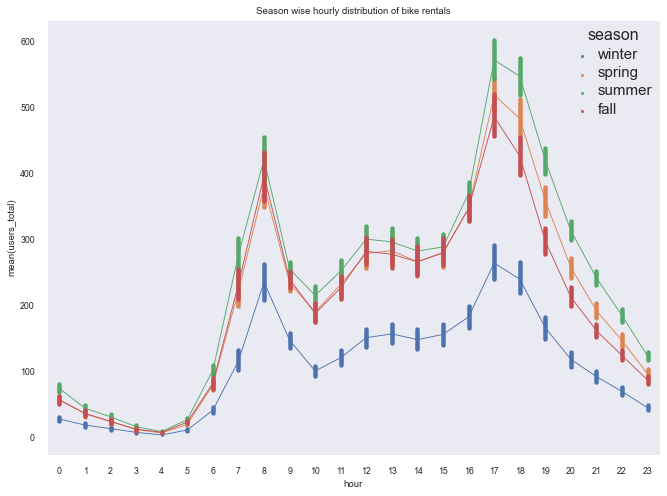

In [11]:
#Here are some of the hypothesis which could influence the demand of bikes:
#Hourly trend: Most of the businessed have rush hours and weak hours. It should not be an exception for bike rentals as well.
#Daily Trend: Registered users vs casual users.
#Rain: The demand of bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out in less humid days.
#Temperature: In warm countries, temperature generally keep people inside. You have to check Washington DC's tempearture for making any guess.
#Business model: Businesses often rely on registred customers more than casual users. There might be some interesting insights that can strengthen this assumption.

# plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")
#fig, ax = plt.subplots()
ax = sns.pointplot(data = hdf[['hour','users_total','season']], x = 'hour', y = 'users_total',
              scale = 0.2, hue = 'season');
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(users_total)');

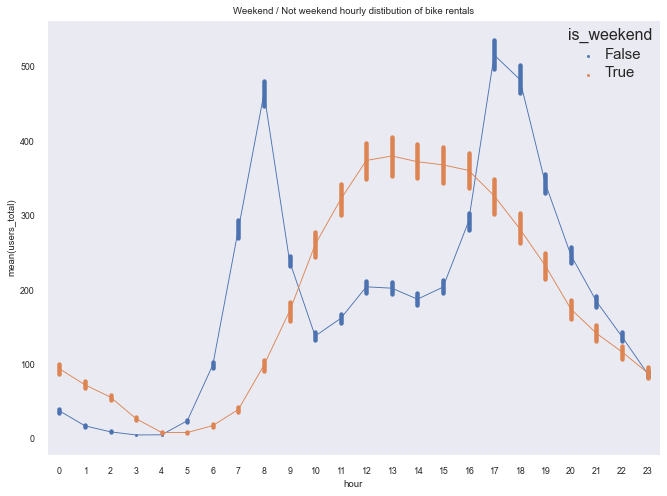

In [21]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sns.set_style("dark")
ax = sns.pointplot(data = hdf[['hour','users_total','is_weekend']], x = 'hour', y = 'users_total', 
    scale = 0.2, hue = 'is_weekend');
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
ax.set(title = 'Weekend / Not weekend hourly distibution of bike rentals',ylabel= 'mean(users_total)');

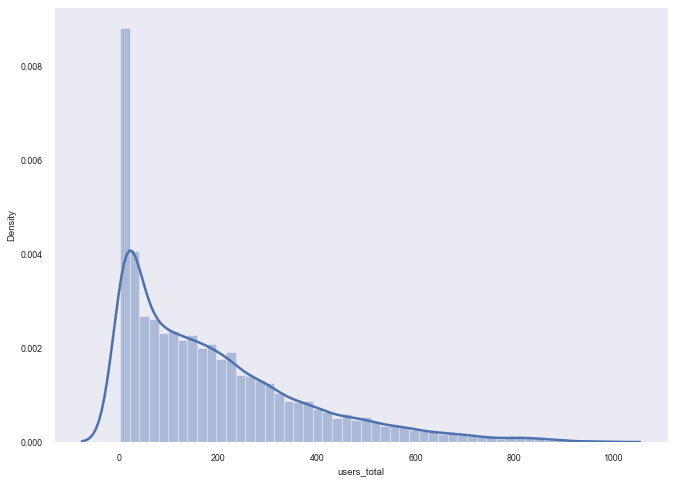

In [22]:
# Do we NEED to eliminate he outliers???
# Outliers / Skewed data
sns.distplot(hdf.users_total);

<AxesSubplot:xlabel='humidity', ylabel='total_count'>

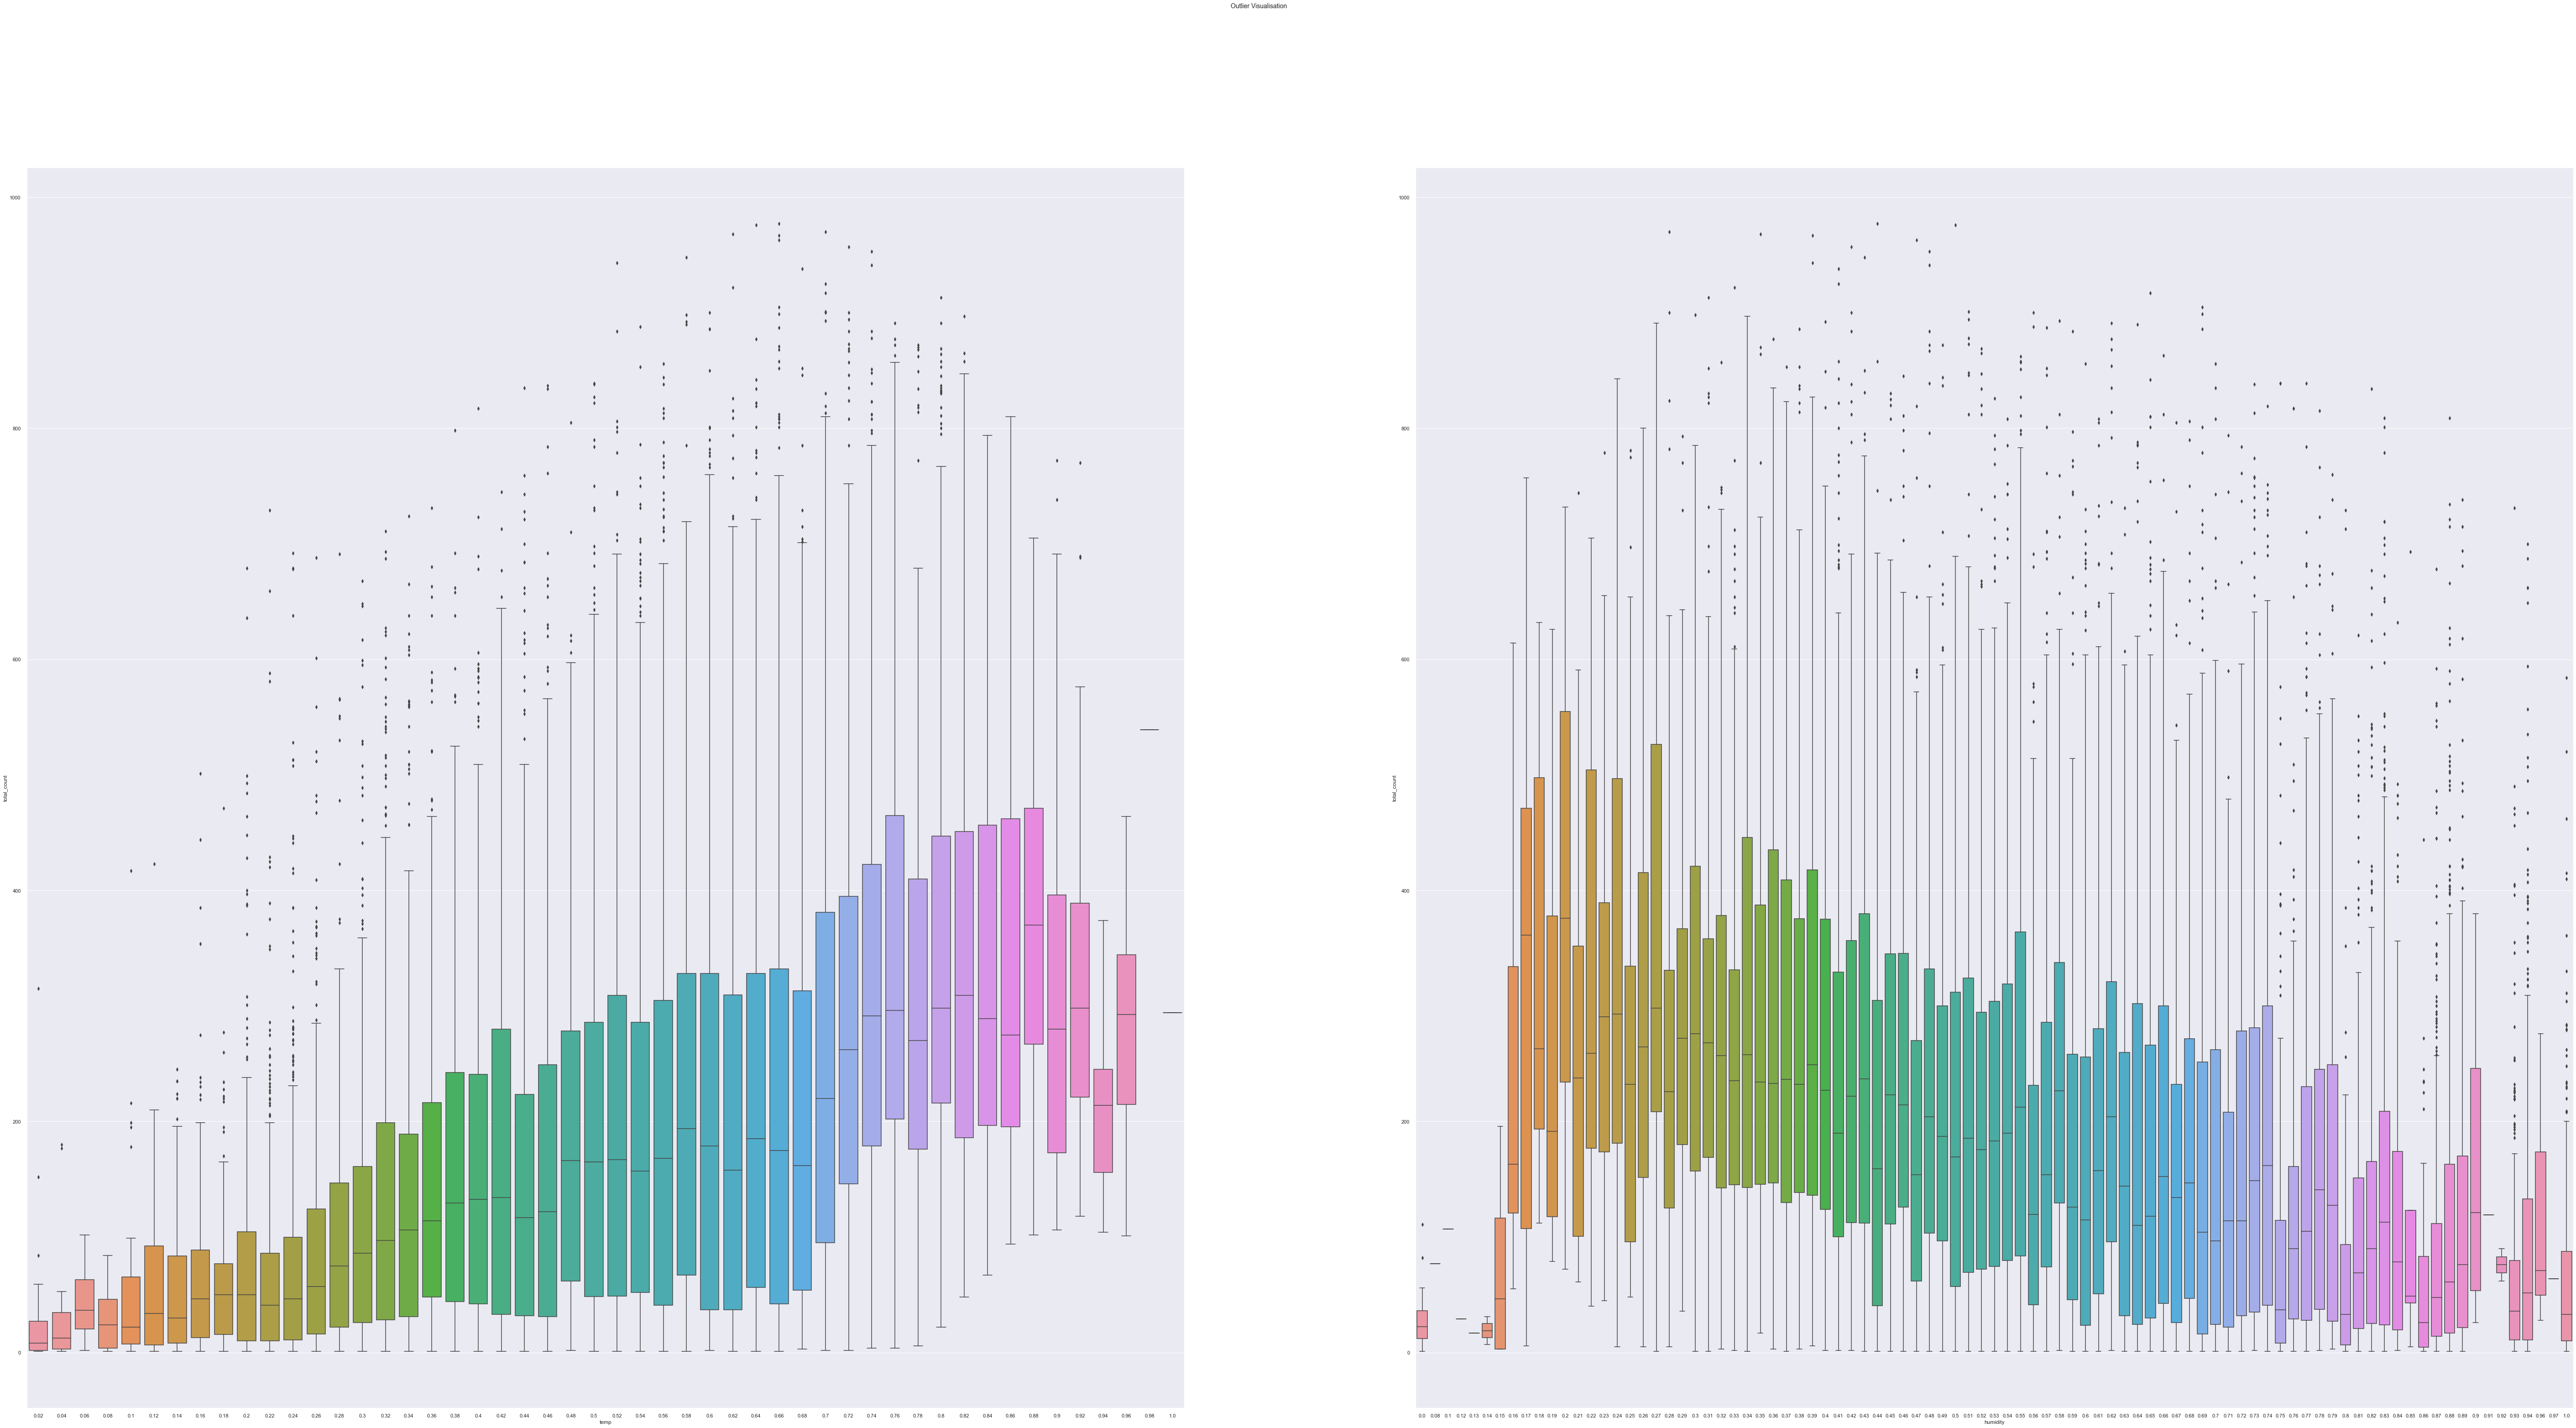

In [23]:
f, ax = plt.subplots(1, 2, figsize=(100, 50))
sns.set_theme(style="darkgrid", palette="pastel")
f.suptitle('Outlier Visualisation', fontsize=14)
#f.subplots_adjust(top=0.85, wspace=0.3)
sns.boxplot(x="temp", y="total_count", data=hdf, ax=ax[0])
sns.boxplot(x="humidity", y="total_count", data=hdf, ax=ax[1])
#sns.boxplot(x="humidity", y="total_count", data=hdf, ax=ax[2])
#sns.boxplot(x="windspeed", y="total_count", data=hdf, ax=ax[3])
#ax[0].set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
#ax[0].set_ylabel("Total count",size = 12,alpha=0.8)
#sns.boxplot(x="wine_type", y="sulphates", data=wines, ax=ax[1])
#ax[1].set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
#ax[1].set_ylabel("Wine Alcohol %",size = 12,alpha=0.3)

<AxesSubplot:xlabel='total_count'>

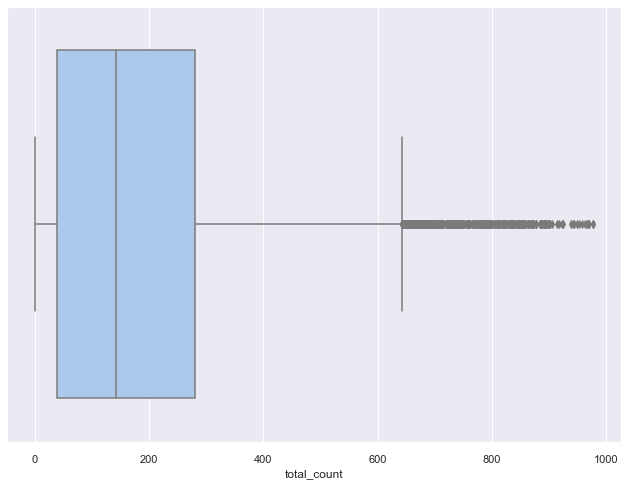

In [24]:
sns.boxplot(hdf['total_count'])

<AxesSubplot:xlabel='temp'>

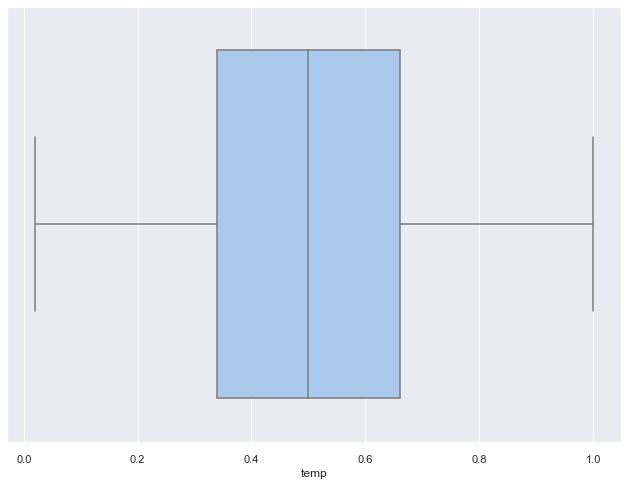

In [25]:
sns.boxplot(hdf['temp'])

In [91]:
## Identify and remove outliers
## sample example. (Reminder: The code snippets are just for giving you idea. You are encouraged to write the codes in your own way.)
## Also check out other features for outliers. Please consider using box plots to visualise outliers in such cases.

## Another issue with outliers is where to draw the line. It may not be clear where the outlier behavior starts. There are some people who arbitrarily eliminate a percentage at the tails (e.g. 5%), which makes no sense whatsoever.'

## But this is basically what we are doing below, right?
#q1 = hdf.total_count.quantile(0.25)
#q3 = hdf.total_count.quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 -(1.5 * iqr) 
#upper_bound = q3 +(1.5 * iqr) 
#hdf = hdf.loc[(hdf.total_count >= lower_bound) & (hdf.total_count <= upper_bound)]

In [12]:
## An alternative approach would be the transformation of the target values to a normal distribution and using mean and standard deviation.
hdf = hdf[np.abs(hdf["total_count"]-hdf["total_count"].mean()) <= 3*hdf["total_count"].std()]

KeyError: 'total_count'

In [ ]:
# Modelling
# Split the datasets into train and test.
# Select important features based on co-relation matrix.
# Check for categorical variables and apply one hot encoding.
# Look if any preprocessing is required
# MinMaxScaler might work better than Standard scaler sometimes.

# Apply and check cross_val_score on the data to check the best value of 'no of folds'. Often, analysts plot a graph for this which look like below:
# https://github.com/CodeAcademyBerlin/Data-Science/blob/master/Module%202/images/r2_cross_val.JPG

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=0)

# X_train.shape, y_train.shape

# X_test.shape, y_test.shape


# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)
#-------------------------------------------
# from sklearn.model_selection import cross_val_score
# clf = svm.SVC(kernel='linear', C=1, random_state=42)
# scores = cross_val_score(clf, X, y, cv=5)
# scores

# print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
#-----------------------------------
# from sklearn import preprocessing
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=0)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
# X_test_transformed = scaler.transform(X_test)
# clf.score(X_test_transformed, y_test)

# A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation:
# from sklearn.pipeline import make_pipeline
# clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
# cross_val_score(clf, X, y, cv=cv)

#------------------------------
# The cross_validate function differs from cross_val_score in two ways:
# It allows specifying multiple metrics for evaluation.
# It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

# from sklearn.model_selection import cross_validate
# from sklearn.metrics import recall_score
# scoring = ['precision_macro', 'recall_macro']
# clf = svm.SVC(kernel='linear', C=1, random_state=0)
# scores = cross_validate(clf, X, y, scoring=scoring)
# sorted(scores.keys())

# scores['test_recall_macro']

# K-fold Cross Validation
# import numpy as np
# from sklearn.model_selection import KFold

# X = ["a", "b", "c", "d"]
# kf = KFold(n_splits=2)
# for train, test in kf.split(X):
#     print("%s %s" % (train, test))

# Repeated K-fold
# import numpy as np
# from sklearn.model_selection import RepeatedKFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# random_state = 12883823
# rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
# for train, test in rkf.split(X):
#     print("%s %s" % (train, test))





In [ ]:
## This is being left as an experiment for you to explore.
#X = train
#y= y.total_count.values.reshape(-1,1)

#lin_reg = linear_model.LinearRegression()

In [ ]:
## You can use the k-fold cross validation (specifically 10-fold) as shown in the following snippet.
# predicted = cross_val_predict(lin_reg, X, y, cv=10)

In [31]:
# You can also make it a function and pass arguments accordingly.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {} 
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}   
d2={'Modelling Algo':model_names,'RMSE':rmse}   

rmsle_frame=pd.DataFrame(d1)
#rmsle_frame
rmse_frame=pd.DataFrame(d2)
#rmse_frame

sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

NameError: name 'x_train' is not defined

In [ ]:
# RMSE
sns.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

In [ ]:
# Google map EXAMPLE
%%html

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1xwOR-Mjborq-vmpGz-JfhucdlDlAmo1c" width="640" height="480"></iframe>

In [ ]:
# For example, top 10 start stations by volume of traffic. (number of occurances)
data2011['Start station'].value_counts()[0:10].plot(kind = 'bar');

In [103]:
# Time Series
# import datetime
df = pd.read_csv('202003-capitalbikeshare-tripdata.csv')
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])
df['End date'] - df['Start date']

0        0 days 00:26:36
1        0 days 00:07:28
2        0 days 00:04:43
3        0 days 00:10:42
4        0 days 00:05:47
               ...      
162525   0 days 00:11:14
162526   0 days 00:08:34
162527   0 days 00:25:25
162528   0 days 00:09:26
162529   0 days 00:17:35
Length: 162530, dtype: timedelta64[ns]

In [104]:
df.iloc[0:5]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [73]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [74]:
df.shape

(162530, 9)

In [75]:
type(df['Start date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
type(df['End date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [79]:
df.index

RangeIndex(start=0, stop=162530, step=1)

In [105]:
df.index = df['Start date']

In [81]:
df.index

DatetimeIndex(['2020-03-01 00:01:16', '2020-03-01 00:02:04',
               '2020-03-01 00:03:45', '2020-03-01 00:05:49',
               '2020-03-01 00:06:53', '2020-03-01 00:10:26',
               '2020-03-01 00:14:30', '2020-03-01 00:15:17',
               '2020-03-01 00:16:20', '2020-03-01 00:17:39',
               ...
               '2020-03-31 22:59:36', '2020-03-31 23:02:31',
               '2020-03-31 23:03:29', '2020-03-31 23:08:10',
               '2020-03-31 23:14:43', '2020-03-31 23:17:58',
               '2020-03-31 23:18:13', '2020-03-31 23:29:00',
               '2020-03-31 23:41:17', '2020-03-31 23:45:05'],
              dtype='datetime64[ns]', name='Start date', length=162530, freq=None)

In [106]:
df['2020-03-01']['Duration']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [83]:
df['2020-03-17'][3456:3459]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-17 19:16:32,243,2020-03-17 19:16:32,2020-03-17 19:20:36,31294,7th & E St SW,31108,4th & M St SW,W21754,Member
2020-03-17 19:16:32,1032,2020-03-17 19:16:32,2020-03-17 19:33:45,31247,Jefferson Dr & 14th St SW,31120,10th & Florida Ave NW,W01468,Member
2020-03-17 19:16:38,775,2020-03-17 19:16:38,2020-03-17 19:29:33,31272,Washington & Independence Ave SW/HHS,31251,12th & L St NW,W23590,Member


In [84]:
sum(df['Start date'] >= df['End date'])

0

In [85]:
df['2020-03-12'][2001:2009]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-12 09:06:50,375,2020-03-12 09:06:50,2020-03-12 09:13:05,31130,7th & S St NW,31642,4th St & K St NW,W22303,Member
2020-03-12 09:06:53,728,2020-03-12 09:06:53,2020-03-12 09:19:01,31113,Columbia Rd & Belmont St NW,31216,14th St & New York Ave NW,W23806,Member
2020-03-12 09:06:55,961,2020-03-12 09:06:55,2020-03-12 09:22:57,31303,Tenleytown / Wisconsin Ave & Albemarle St NW,31121,Calvert St & Woodley Pl NW,W20455,Member
2020-03-12 09:06:59,587,2020-03-12 09:06:59,2020-03-12 09:16:47,31244,4th & E St SW,31230,Metro Center / 12th & G St NW,W23546,Member
2020-03-12 09:07:06,717,2020-03-12 09:07:06,2020-03-12 09:19:03,31268,12th & U St NW,31655,New Jersey Ave & F St NW,W21093,Member
2020-03-12 09:07:09,574,2020-03-12 09:07:09,2020-03-12 09:16:43,31218,L'Enfant Plaza / 7th & C St SW,31238,14th & G St NW,W22263,Member
2020-03-12 09:07:17,301,2020-03-12 09:07:17,2020-03-12 09:12:18,31618,4th & East Capitol St NE,31623,Columbus Circle / Union Station,W20559,Member
2020-03-12 09:07:36,959,2020-03-12 09:07:36,2020-03-12 09:23:35,31118,3rd & Elm St NW,31621,4th & D St NW / Judiciary Square,W23077,Member


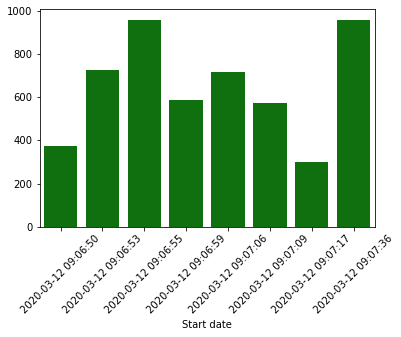

In [127]:
import matplotlib.pyplot as plt
ax = sns.barplot( x = df['2020-03-12']['Duration'][2001:2009].index, y = df['2020-03-12']['Duration'][2001:2009].values, color = 'green')

for item in ax.get_xticklabels():
    item.set_rotation(45)

In [108]:
df['2020-03-20']['Duration']

Start date
2020-03-20 00:01:03     784
2020-03-20 00:02:01     437
2020-03-20 00:07:23     600
2020-03-20 00:11:06     326
2020-03-20 00:12:22     350
                       ... 
2020-03-20 23:55:48    2702
2020-03-20 23:56:04    3217
2020-03-20 23:56:15    3210
2020-03-20 23:57:41    7447
2020-03-20 23:57:46    7571
Name: Duration, Length: 4809, dtype: int64

<AxesSubplot:xlabel='Start date'>

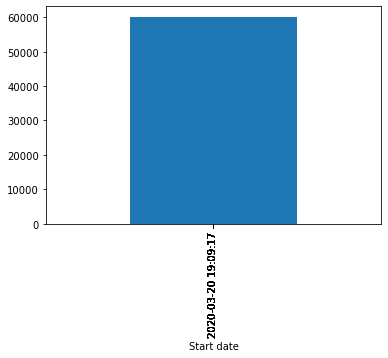

In [87]:
df['2020-03-20']['Duration'][4008:4020].plot(kind = 'bar')

In [88]:
df['2020-03-18'].shape

(3819, 9)

In [89]:
df['2020-03-18'].shape[0]

3819

In [90]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] 

1065.615372194413

In [91]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

17.760256203240218

In [92]:
trip_duration_per_trip = df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

In [93]:
trip_duration_per_trip

17.760256203240218

In [94]:
df['2020-03-07']['Duration'].sum()

6599356

In [95]:
trip_duration_per_trip_march = df['2020-03']['Duration'].sum() / df['2020-03']['Duration'].shape[0] / 60

In [96]:
trip_duration_per_trip_march

18.978877745646958

In [97]:
df

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-01 00:01:16,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
2020-03-01 00:02:04,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2020-03-01 00:03:45,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
2020-03-01 00:05:49,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
2020-03-01 00:06:53,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member
...,...,...,...,...,...,...,...,...,...
2020-03-31 23:17:58,673,2020-03-31 23:17:58,2020-03-31 23:29:12,31235,19th St & Constitution Ave NW,31265,5th St & Massachusetts Ave NW,W22920,Member
2020-03-31 23:18:13,514,2020-03-31 23:18:13,2020-03-31 23:26:47,31203,14th & Rhode Island Ave NW,31324,18th & New Hampshire Ave NW,21054,Member
2020-03-31 23:29:00,1524,2020-03-31 23:29:00,2020-03-31 23:54:25,31110,20th St & Florida Ave NW,31403,5th & Kennedy St NW,W24341,Member


In [12]:
df.index.time

NameError: name 'df' is not defined

In [ ]:
df1 = df

In [ ]:
df1.index = df1.index.time

In [ ]:
df1 = pd.Series(df1)

In [ ]:
df1

In [98]:
df = df['Duration']

In [99]:
df

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-31 23:17:58     673
2020-03-31 23:18:13     514
2020-03-31 23:29:00    1524
2020-03-31 23:41:17     565
2020-03-31 23:45:05    1054
Name: Duration, Length: 162530, dtype: int64

In [100]:
df.loc['2020-03-01']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [101]:
df.iloc[0:5]

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
Name: Duration, dtype: int64

In [4]:
# JSON
df_json = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')
df_json

,data,last_updated,ttl
stations,"[{'last_reported': 1611652631, 'eightd_has_ava...",1611731795,5


In [5]:
len(df_json.data['stations'])

621

In [6]:
df_json.data['stations'][1]['num_bikes_available']

1

<AxesSubplot:>

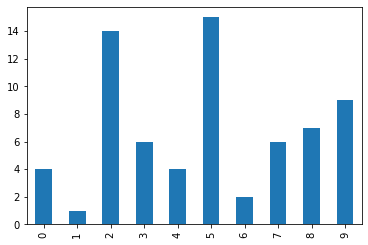

In [7]:
no_bikes = []
for i in range(len(df_json.data['stations'])):
    no_bikes.append(df_json.data['stations'][i]['num_bikes_available'])

pd.Series(no_bikes)[0:10].plot(kind='bar')